In [1]:
%load_ext autoreload
%autoreload 2
_ = !pip3 install matplotlib einops
%matplotlib inline

import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import CelebA
from torchvision.transforms import ToTensor, Compose, CenterCrop, Normalize
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

dev = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
train_set = CelebA('./dataset', split='train', transform=Compose([
        CenterCrop((128, 128)),
        ToTensor(),
        Normalize(.5, .5),
    ]), download=True)

Files already downloaded and verified


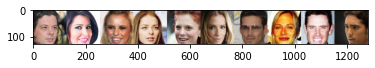

In [3]:
def showimgs(imgs):
    #plt.figure(figsize=(20, 10))
    imgs = imgs.movedim((0, 2, 3, 1), (0, 1, 2, 3))
    imgs = np.concatenate(imgs.detach().cpu().numpy().tolist(), axis=1)
    imgs = (imgs + 1)/2
    plt.imshow(imgs)


#img, label = train_set[np.random.randint(0, len(train_set))]

BS = 16
train_loader = DataLoader(train_set, batch_size=BS, shuffle=True)
batch, _ = next(iter(train_loader))
showimgs(batch[:10])

In [4]:
from model import DenoisingDiffusion
import os

def get_model():
    model = DenoisingDiffusion(diffusion_steps=100, dev=dev, train=True)
    try:
        chks = os.listdir('./chkpnts')
        ns = [int(chk.split('checkpnt_epoch-')[1].split('.pt')[0])
             for chk in chks]
        if len(ns) == 0:
            raise Exception()
        n = sorted(ns)[-1]
        model.load(f'chkpnts/checkpnt_epoch-{n}.pt')

    except Exception:
        pass
    return model

141385702


  0%|          | 0/99 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


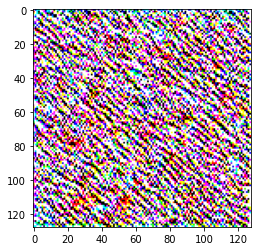

In [5]:
model = get_model()
print(sum([p.numel() for p in model.parameters()]))
img = model.backward_process(torch.randn((1, 3, 128, 128)).to(dev)).cpu()
showimgs(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


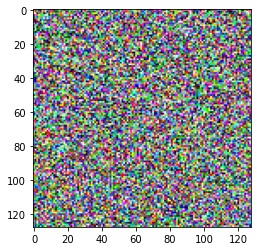

In [6]:
showimgs(torch.randn((1, 3, 128, 128)))

In [ ]:
model.train(1000, train_loader)

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/10174 [00:00<?, ?it/s]